# Imports and Network Analysis

below is way to fix the libraries' dependences

In [ ]:
!pip install node2vec==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip uninstall node2vec
!pip install node2vec==0.4.2
!pip uninstall gensim
!pip install gensim==3.8.2
!pip show gensim
!pip show node2vec

Found existing installation: node2vec 0.4.2
Uninstalling node2vec-0.4.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/node2vec-0.4.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/node2vec/*
Proceed (Y/n)? Y
  Successfully uninstalled node2vec-0.4.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached node2vec-0.4.2-py3-none-any.whl
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/gensim-4.3.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/gensim/*
Proceed (Y/n)? Y
  Successfully uninstalled gensim-4.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-3.8.2.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.2-cp39-cp39-linux_x86_64.whl size=24949194 sha256=2213f6adde24e29fc3437c825c2bdc21fb695

In [ ]:
%matplotlib inline
import os
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.sparse import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, pairwise_distances
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from xgboost import XGBClassifier
from tqdm import tqdm
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load train samples 
import csv

with open("/content/drive/Shareddrives/MLNS/Kaggle/data/train.txt", "r") as f:
    reader = csv.reader(f)
    train_set = list(reader)
train_set = [element[0].split(" ") for element in train_set]

# loads training sample as a list of lists
train_set[:10]

[['939', '3809', '1'],
 ['2442', '5784', '1'],
 ['179', '3809', '1'],
 ['857', '2280', '1'],
 ['1358', '5722', '1'],
 ['1459', '5039', '1'],
 ['6323', '6810', '0'],
 ['1114', '6614', '1'],
 ['867', '2528', '0'],
 ['4298', '6452', '1']]

In [ ]:
# Convert to graph
G = nx.Graph()

# Add nodes to the graph
for pair in train_set:
    G.add_node(pair[0])
    G.add_node(pair[1])

# Add edges to the graph
for pair in train_set:
    if pair[2] == '1':
        G.add_edge(pair[0], pair[1])

# Print the graph
print(G.nodes())
print(G.edges())

['939', '3809', '2442', '5784', '179', '857', '2280', '1358', '5722', '1459', '5039', '6323', '6810', '1114', '6614', '867', '2528', '4298', '6452', '2366', '3087', '1695', '5788', '4749', '7174', '520', '616', '4328', '5380', '3396', '5750', '1423', '3480', '236', '277', '38', '4720', '70', '4674', '1214', '4629', '538', '1593', '1261', '5518', '7098', '4383', '1111', '2153', '4187', '5404', '5462', '7272', '5363', '7405', '2338', '4718', '4585', '6909', '887', '5353', '6961', '7039', '32', '4422', '964', '5762', '779', '2880', '3377', '5673', '435', '3428', '902', '6415', '2324', '6363', '2167', '4956', '3305', '3348', '3332', '4613', '5792', '7426', '1664', '3654', '4860', '6291', '2016', '5335', '4', '5956', '5030', '6347', '7124', '3778', '6120', '6354', '2413', '9', '460', '318', '4883', '1745', '5247', '1512', '2494', '4167', '1867', '2070', '759', '3604', '2021', '2780', '2590', '5565', '1929', '5347', '2480', '7118', '2574', '6505', '2363', '5560', '1525', '1985', '4707', '500

In [ ]:
# Load test samples and convert it to a graph
with open("/content/drive/Shareddrives/MLNS/Kaggle/data/test.txt", "r") as f:
    reader = csv.reader(f)
    test_set = list(reader)
test_set = [element[0].split(" ") for element in test_set]

# Convert into a graph
G_test = nx.Graph()

# Add nodes to the graph
for pair in test_set:
    G_test.add_node(pair[0])
    G_test.add_node(pair[1])

# Print the nodes
print(G_test.nodes())

['3425', '4524', '1620', '2617', '4832', '6317', '4984', '7298', '385', '5481', '1722', '2930', '1534', '3330', '5015', '6354', '856', '2504', '851', '5515', '294', '3669', '2461', '3177', '2252', '5782', '2161', '3809', '6799', '6868', '759', '1340', '1275', '2441', '480', '895', '1071', '3089', '1016', '5463', '6807', '7364', '51', '3810', '3011', '4462', '3705', '4205', '4705', '6891', '2058', '4533', '1995', '5499', '1675', '3785', '6422', '7560', '2464', '7174', '2739', '4261', '2094', '6057', '3141', '6924', '1353', '3966', '596', '1051', '4031', '4201', '6824', '7571', '251', '3080', '2551', '3764', '5722', '6570', '1536', '1712', '5204', '5464', '3133', '7272', '750', '1228', '291', '3350', '70', '2212', '3830', '5321', '1473', '3427', '5107', '5920', '3319', '7231', '755', '3836', '3001', '3073', '6672', '1205', '2543', '2523', '5258', '1745', '2568', '3373', '4127', '3625', '7310', '1630', '7202', '1826', '3332', '2635', '6520', '2807', '6498', '2680', '3439', '33', '3571', '

In [ ]:
# Compute various characteristics of the training graph network
def compute_network_characteristics(graph):
    prop = {}
    prop['N'] = graph.number_of_nodes() # number of nodes
    prop['M'] = graph.number_of_edges() # number of edges
    # degrees = list(dict(G.degree()).values())
    degrees = [degree for node, degree in graph.degree()] # degree list
    prop['min_degree'] = np.min(degrees) # minimum degree
    prop['max_degree'] = np.max(degrees) # maximum degree
    prop['mean_degree'] = np.mean(degrees) # mean of node degrees
    prop['median_degree'] = np.median(degrees) # median of node degrees
    prop['density'] = nx.density(graph) # density of the graph
    return prop

###################################################################

prop = compute_network_characteristics(graph=G)
print("Number of nodes: {}".format(prop['N']))
print("Number of edges: {}".format(prop['M']))
print("Min. degree: {}".format(prop['min_degree']))
print("Max. degree: {}".format(prop['max_degree']))
print("Mean degree: {}".format(prop['mean_degree']))
print("Median degree: {}".format(prop['median_degree']))
print("Density: {}".format(prop['density']))

Number of nodes: 3597
Number of edges: 5248
Min. degree: 1
Max. degree: 361
Mean degree: 2.917987211565193
Median degree: 2.0
Density: 0.000811453618344047


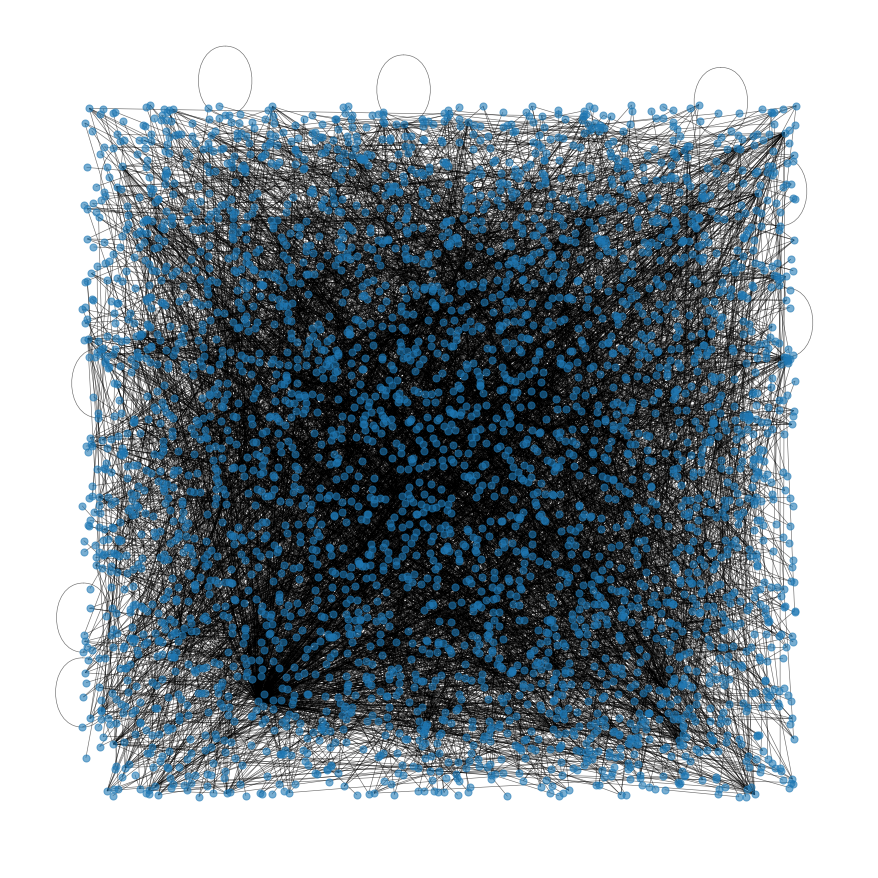

In [ ]:
# Plot graph
plt.figure(figsize=(12,12))

pos = nx.random_layout(G, seed=19)
nx.draw(G, with_labels=False,  pos = pos, node_size = 50, alpha = 0.6, width = 0.6)

plt.show()

In [ ]:
# Record self-loops
self_loops_node = list(nx.selfloop_edges(G))
has_self_loop = {}
for node in nx.nodes(G):
  has_self_loop[node] = 0
for (x,y) in self_loops_node:
  has_self_loop[x] = 1

In [ ]:
node_information = pd.read_csv('/content/drive/Shareddrives/MLNS/Kaggle/data/node_information.csv', header = None)
node_information.head()

,0,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Extraction and Train-Test Split

In this section, we adopt a supervised approach for the link prediction task. We thus first pre-process the dataset so as to create labels for each edge, then derive a feature vector for each edge, before passing it to a traditional classification approach that classifies each edge into one of two categories. 

Features using node information of the graph

In [ ]:
def cosine(node_information, source, target):
    a = node_information[node_information[0] == int(source)]
    b = node_information[node_information[0] == int(target)]
    return cosine_similarity(np.array(a.iloc[0,1:]).reshape(1,-1), np.array(b.iloc[0,1:]).reshape(1,-1))[0][0]
  
def euclidian(node_information, source, target):
    a = node_information[node_information[0] == int(source)]
    b = node_information[node_information[0] == int(target)]
    return euclidean_distances(np.array(a.iloc[0,1:]).reshape(1,-1), np.array(b.iloc[0,1:]).reshape(1,-1))[0][0]

def hamming_distance(node_information, source, target):
    a = node_information[node_information[0] == int(source)]
    b = node_information[node_information[0] == int(target)]
    x = np.array(a.iloc[0,1:])
    y = np.array(b.iloc[0,1:])
    return np.count_nonzero(x != y)

def manhattan_distance(node_information, source, target):
    a = node_information[node_information[0] == int(source)]
    b = node_information[node_information[0] == int(target)]
    x = np.array(a.iloc[0,1:])
    y = np.array(b.iloc[0,1:])
    return np.sum(np.abs(x - y))

def katz_similarity(G, source_node, target_node, alpha): # cannot work like adar
    # Compute the adjacency matrix
    A = nx.adjacency_matrix(G).toarray()
    # Compute the maximum eigenvalue of the adjacency matrix
    eigmax = max(np.abs(np.linalg.eigvals(A)))
    # Compute the scaling factor beta
    beta = alpha / eigmax
    # Compute the Katz centrality for the source and target nodes
    source_katz = nx.katz_centrality(G, alpha=alpha, beta=beta, max_iter=5000, tol=1e-10, nstart={source_node: 1})
    target_katz = nx.katz_centrality(G, alpha=alpha, beta=beta, max_iter=5000, tol=1e-10, nstart={target_node: 1})
    # Return the Katz similarity between the source and target nodes
    return source_katz[source_node] * target_katz[target_node]

In [ ]:
def generate_samples(graph, train_set_ratio):
    """
    Graph pre-processing step required to perform supervised link prediction
    Create training and test sets
    """
        
    # --- Step 0: The graph must be connected ---
    if nx.is_connected(G) is not True:
        raise ValueError("The graph contains more than one connected component!")
       
    # --- Step 1: Generate positive edge samples for testing set ---
    residual_g = graph.copy()
    test_pos_samples = []
      
    # Store the shuffled list of current edges of the graph
    edges = list(residual_g.edges())
    np.random.seed(2)
    np.random.shuffle(edges)
    
    # Define number of positive test samples desired
    test_set_size = int((1.0 - train_set_ratio) * graph.number_of_edges())
    train_set_size = graph.number_of_edges() - test_set_size
    num_of_pos_test_samples = 0
    
    # Remove random edges from the graph, leaving it connected
    for edge in edges:
        
        # Remove the edge
        residual_g.remove_edge(edge[0], edge[1])
        
        # Add the removed edge to the positive sample list if the network is still connected
        if nx.is_connected(residual_g):
            num_of_pos_test_samples += 1
            test_pos_samples.append(edge)
        # Otherwise, re-add the edge to the network
        else: 
            residual_g.add_edge(edge[0], edge[1])
        
        # If we have collected enough number of edges for testing set, we can terminate the loop
        if num_of_pos_test_samples == test_set_size:
            break
    
    # Check if we have the desired number of positive samples for testing set 
    if num_of_pos_test_samples != test_set_size:
        raise ValueError("Enough positive edge samples could not be found!")

        
    # --- Step 2: Generate positive edge samples for training set ---
    # The remaining edges are simply considered for positive samples of the training set
    train_pos_samples = list(residual_g.edges())
        
        
    # --- Step 3: Generate the negative samples for testing and training sets ---
    non_edges = list(nx.non_edges(graph))
    np.random.seed(2)
    np.random.shuffle(non_edges)
    
    train_neg_samples = non_edges[:train_set_size] 
    test_neg_samples = non_edges[train_set_size:train_set_size + test_set_size]

    
    # --- Step 4: Combine sample lists and create corresponding labels ---
    # For training set
    train_samples = train_pos_samples + train_neg_samples
    train_labels = [1 for _ in train_pos_samples] + [0 for _ in train_neg_samples]
    # For testing set
    test_samples = test_pos_samples + test_neg_samples
    test_labels = [1 for _ in test_pos_samples] + [0 for _ in test_neg_samples]
    
    return residual_g, train_samples, train_labels, test_samples, test_labels


In [ ]:
def feature_extractor(graph, samples,node_information):
    """
    Creates a feature vector for each edge of the graph contained in samples 
    """
    feature_vector = []
    
    # --- Extract manually diverse features relative to each edge contained in samples --- 

    # Degree Centrality measure
    deg_centrality = nx.degree_centrality(graph)
    
    # Betweeness centrality measure
    betweeness_centrality = nx.betweenness_centrality(graph)

    for edge in tqdm(samples):
        source_node, target_node = edge[0], edge[1]

        # Degree Centrality
        source_degree_centrality = deg_centrality[source_node]
        target_degree_centrality = deg_centrality[target_node]
        
        # Betweeness centrality measure 
        diff_bt = betweeness_centrality[target_node] - betweeness_centrality[source_node]

        # Preferential Attachement 
        pref_attach = list(nx.preferential_attachment(graph, [(source_node, target_node)]))[0][2]

        # Jaccard
        jacard_coeff = list(nx.jaccard_coefficient(graph, [(source_node, target_node)]))[0][2]

        # Cosine similarity
        cos = cosine(node_information, source_node, target_node)

        # Euclidian similarity
        euc = euclidian(node_information, source_node, target_node)
        
        # Hamming Distance
        ham = hamming_distance(node_information, source_node, target_node)

        # Manhattan Distance
        man = manhattan_distance(node_information, source_node, target_node)

        #same = 1 if cluster_nodes[target_node] == cluster_nodes[source_node] else 0

        # Create edge feature vector with all metric computed above
        feature_vector.append(np.array([source_degree_centrality, target_degree_centrality, pref_attach, 
                                        jacard_coeff, cos, euc, ham, man])) 
        
        '''
        Commenting out features that were used but were not helpful
        int(source_node), int(target_node), has_self_loop[source_node], has_self_loop[target_node], G.degree[source_node], G.degree[target_node], same
        '''

    return feature_vector

Function to perform prediction

In [ ]:
def prediction(graph, train_features, test_features, train_labels, test_labels, fin_test_features, model, embeddings=False):
    """
    Downstream ML task using edge embeddings to classify them 
    """
    
    # --- Build the model and train it ---
    clf = model #load the model
    clf.fit(train_features, train_labels)

    #Predicting probabilities
    train_preds_prob = clf.predict_proba(train_features)[:, 1]
    test_preds_prob = clf.predict_proba(test_features)[:, 1]

    #Predicting labels
    train_preds = clf.predict(train_features)
    test_preds = clf.predict(test_features)
    fin_test_preds = clf.predict(fin_test_features)

    # --- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from predictions ---
    print('ROC curve: ')
    fpr, tpr, _ = roc_curve(test_labels, test_preds_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    #-----------------Calculate roc curves based on thershold-----------------------
    plt.figure(figsize=(6,6))
    precision, recall, thresholds = precision_recall_curve(test_labels, test_preds_prob)
    # convert to f1 score
    f1 = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(f1)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], f1[ix]))
    # plot the roc curve for the model
    no_skill = test_labels.count(1) / len(test_labels)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Our model')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    # show the plot
    plt.show()

    #------------------Compute accuracy and f1------------
    train_acc = accuracy_score(train_labels, train_preds)
    test_acc = accuracy_score(test_labels, test_preds)
    f1_train = f1_score(train_labels, train_preds)
    f1_test = f1_score(test_labels, test_preds)

    print('Train accuracy :', train_acc)
    print('Test accuracy :', test_acc)
    print('Train f1 :', f1_train)
    print('Test f1 :', f1_test)

    #--------------------Classification report------------------------
    print('\n',classification_report(test_labels, test_preds))

    #-------------------Feature importance------------------------------
    if embeddings:
      print('No feature importance plot')
    elif isinstance(clf, LogisticRegression):
      # Get feature importance from logistic regression model
      importance = abs(clf.coef_[0])
      features = ['source_degree_centrality', 'target_degree_centrality', 'pref_attach','jacard_coeff', 'cos', 'euc', 'ham', 'man']
     
      # Sort feature importance in descending order
      sorted_idx = importance.argsort()[::-1]

      plt.figure(figsize=(15,10))
      plt.bar(range(len(train_features[0])), importance)
      plt.xticks(range(len(train_features[0])), features, rotation=90)
      plt.ylabel("Importance score")
      plt.xlabel("Feature")
      plt.title("Feature importance scores")
      plt.show()
    elif isinstance(clf, XGBClassifier):
      xgb.plot_importance(clf)
    

    #-------------------Optimize threshold------------------------------
    max_acc=0
    max_acc_thres=0
    max_f1=0
    max_f1_thres=0
    i=0.38
    while i<=0.70: 
        preds_splitted2=(clf.predict_proba(test_features)[:,1]>=i).astype(int)
        acc_comp=accuracy_score(test_labels,preds_splitted2)
        if acc_comp>=max_acc:
            max_acc=acc_comp
            max_acc_thres=i
        f1_comp=f1_score(test_labels,preds_splitted2)
        if f1_comp>=max_f1:
            max_f1=f1_comp
            max_f1_thres=i
        i=i+0.001
    train_preds_thres=(clf.predict_proba(train_features)[:,1]>=max_acc_thres).astype(int)
    max_train_acc = accuracy_score(train_labels, train_preds_thres)
    print('\ntrain accuracy best =', max_train_acc,'with threshold =',max_acc_thres)
    print('test accuracy best =',max_acc,'with threshold =',max_acc_thres)
    print('test f1 score best =',max_f1,'with threshold =',max_f1_thres)

    # Predictions with optimised threshold  
    fin_test_preds_thres=(clf.predict_proba(fin_test_features)[:,1]>=max_acc_thres).astype(int)

    sns.histplot(fin_test_preds_thres, discrete=True)
    plt.show()

    return roc_auc, fin_test_preds, fin_test_preds_thres

In [ ]:
def combine_model_and_emb(model, filename):

    predictions_dict = {}
    #----------------Model 1--------------------------
    roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, model)

    # Put predictions in the dictionary
    predictions_dict[str(fin_test_features_normal)] = fin_test_preds_thres

    #-------------Model 2-----------------------
    clf2 = LogisticRegression(random_state=42, max_iter = 10000)
    roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_embedding, test_features_embedding, train_labels, test_labels, fin_test_features_embedding, clf2, embeddings=True)

    # Put prediction in the dictionary
    predictions_dict[str(fin_test_features_embedding)] = fin_test_preds_thres

    # Combining the predictions from all the models into a pandas DataFrame
    combined_predictions = pd.DataFrame(predictions_dict)

    # Taking the mode of the predictions to get the final predictions
    fin_test_preds = np.logical_or(predictions_dict[str(fin_test_features_normal)], predictions_dict[str(fin_test_features_embedding)]).astype(int)

    # Save predictions
    save_preds(fin_test_preds, filename)

In [ ]:
def save_preds(predictions, filename):
  random_pred = zip(np.array(range(len(test_set))), predictions)
  with open(filename,"w") as pred:
      csv_out = csv.writer(pred)
      csv_out.writerow(i for i in ["ID", "Predicted"])
      for row in random_pred:
          csv_out.writerow(row)
      pred.close()

In [ ]:
# --- Construct the training and testing sets ---
residual_g, train_samples, train_labels, test_samples, test_labels = generate_samples(graph=G, train_set_ratio=0.8)

# Node Embeddings

In [ ]:
# Node embedding
from gensim.models import Word2Vec
from node2vec import Node2Vec

# Node 2 Vec
nodevec = Node2Vec(G, dimensions=32, walk_length=8, num_walks=200, workers=1, p=1, q=1, seed=42)
embedding = nodevec.fit(window=5, min_count=1, batch_words=4)

# Save the embeddings
embedding.wv.save_word2vec_format('test_w2v.txt', binary=False)

Computing transition probabilities:   0%|          | 0/3597 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [04:30<00:00,  1.35s/it]


# Extract all necessary features

In [ ]:
# --- Create feature vector for all edges in training set and test set using embeddings ---
feature_func = lambda x,y: abs(x-y)
train_features_embedding = [feature_func(embedding.wv[edge[0]], embedding.wv[edge[1]]) for edge in train_samples]
test_features_embedding = [feature_func(embedding.wv[edge[0]], embedding.wv[edge[1]]) for edge in test_samples]
fin_test_features_embedding = [feature_func(embedding.wv[edge[0]], embedding.wv[edge[1]]) for edge in test_set]

# --- Create feature vector for all edges in training set and test set ---
train_features_normal = feature_extractor(residual_g, train_samples, node_information)
test_features_normal = feature_extractor(residual_g, test_samples, node_information)
fin_test_features_normal = feature_extractor(G, test_set, node_information)

100%|██████████| 3498/3498 [00:35<00:00, 97.60it/s] 


# Models

### Logistic Regression

#### Grid Search for logistic regression

In [ ]:
'''
THIS PART WILL BE COMMENTED OUT FOR THE PURPOSE OF RUNNING THE NOTEBOOK FASTER

# Logistic Regression
lr = LogisticRegression(random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000, 10000],
}

grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')
roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, grid_lr)

print(grid_lr.best_params_)
'''

ROC curve: 


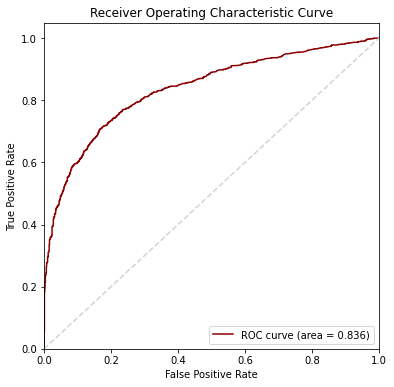

Best Threshold=0.415814, F-Score=0.768


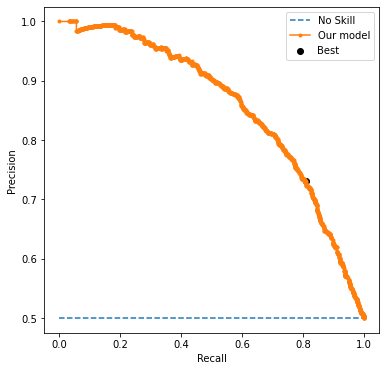

Train accuracy : 0.708502024291498
Test accuracy : 0.7621544327931363
Train f1 : 0.6579094466182224
Test f1 : 0.7366754617414248

               precision    recall  f1-score   support

           0       0.72      0.86      0.78      1049
           1       0.83      0.67      0.74      1049

    accuracy                           0.76      2098
   macro avg       0.77      0.76      0.76      2098
weighted avg       0.77      0.76      0.76      2098



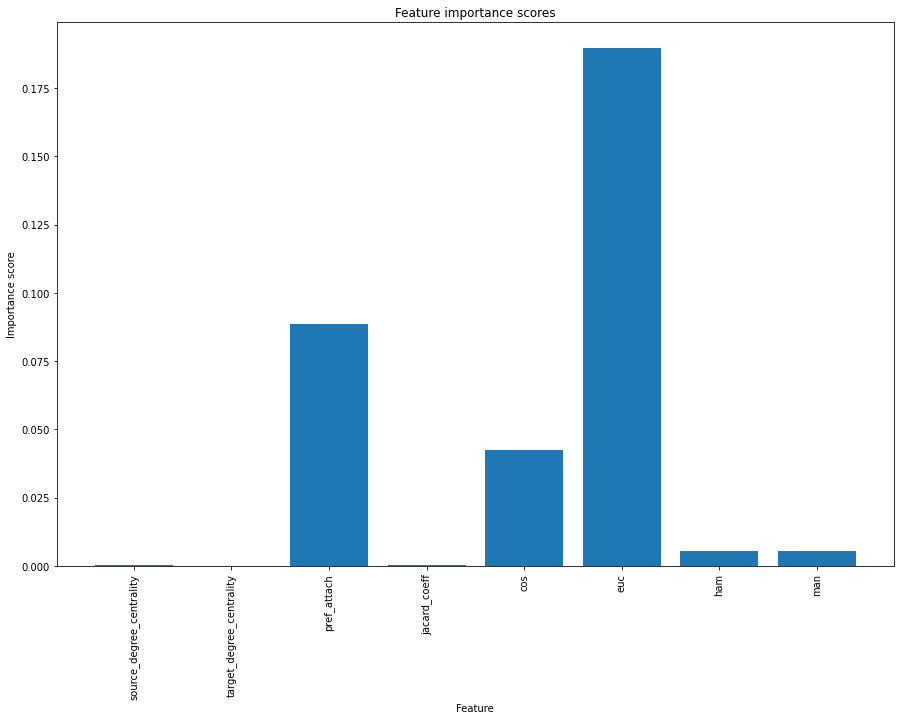


train accuracy best = 0.7115979995236961 with threshold = 0.4770000000000001
test accuracy best = 0.7697807435653002 with threshold = 0.4770000000000001
test f1 score best = 0.767420814479638 with threshold = 0.41600000000000004


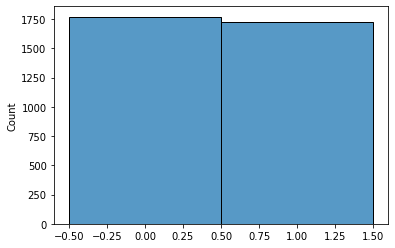

In [ ]:
clf = LogisticRegression(random_state=42, max_iter = 100000, penalty = 'l2', solver = 'saga')
roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, clf)

#Save predictions
save_preds(fin_test_preds_thres, 'simple_lr.csv')

ROC curve: 


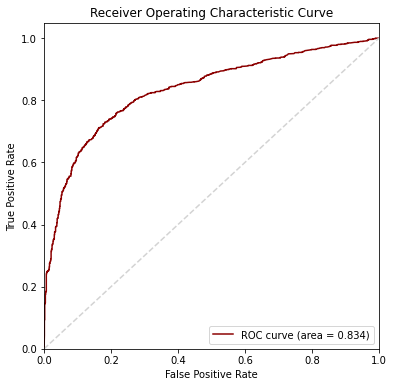

Best Threshold=0.423482, F-Score=0.774


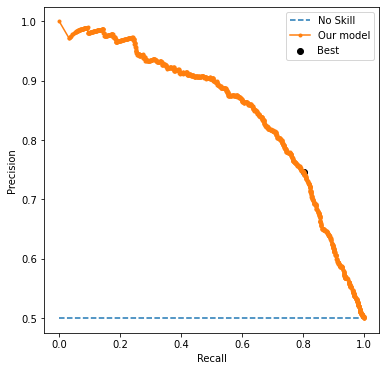

Train accuracy : 0.7121933793760419
Test accuracy : 0.7673975214489991
Train f1 : 0.6579878307626998
Test f1 : 0.7398720682302772

               precision    recall  f1-score   support

           0       0.72      0.87      0.79      1049
           1       0.84      0.66      0.74      1049

    accuracy                           0.77      2098
   macro avg       0.78      0.77      0.76      2098
weighted avg       0.78      0.77      0.76      2098



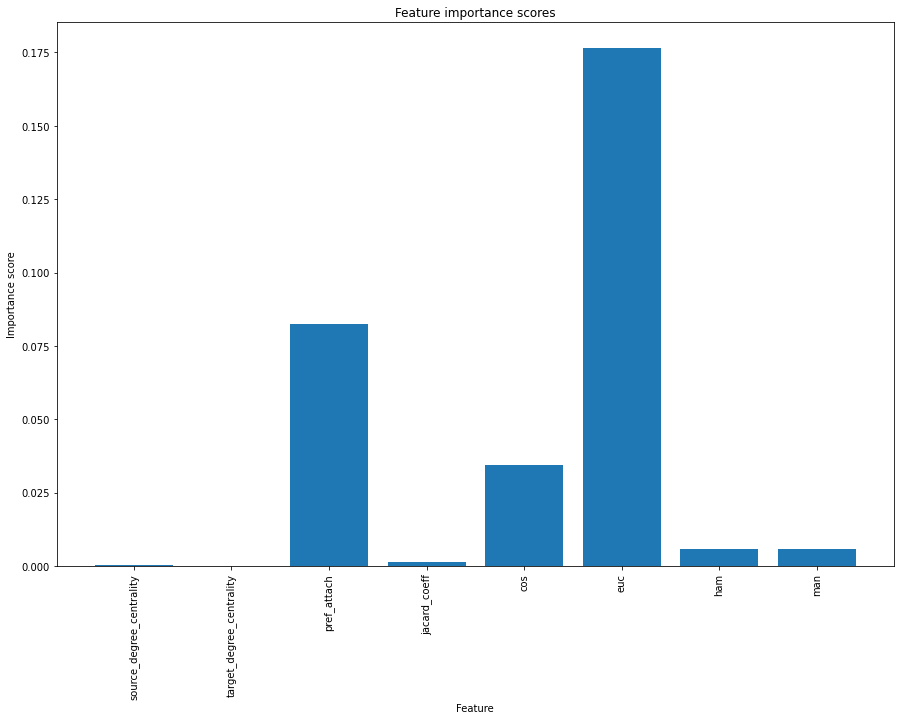


accuracy best = 0.7740705433746425  with threshold = 0.4610000000000001
f1 score best = 0.7732240437158471  with threshold = 0.42000000000000004


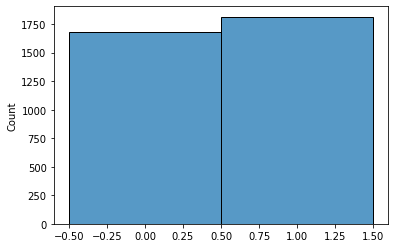

ROC curve: 


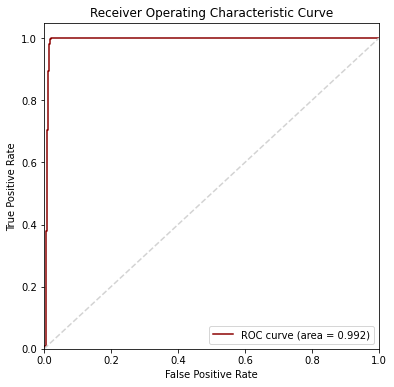

Best Threshold=0.506123, F-Score=0.990


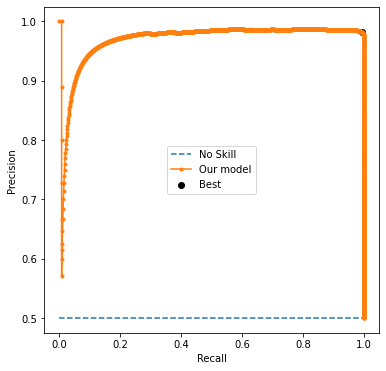

Train accuracy : 0.9919028340080972
Test accuracy : 0.9895138226882746
Train f1 : 0.9919659735349716
Test f1 : 0.9895833333333333

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1049
           1       0.98      1.00      0.99      1049

    accuracy                           0.99      2098
   macro avg       0.99      0.99      0.99      2098
weighted avg       0.99      0.99      0.99      2098

No feature importance plot

accuracy best = 0.9895138226882746  with threshold = 0.5060000000000001
f1 score best = 0.9895833333333333  with threshold = 0.5060000000000001


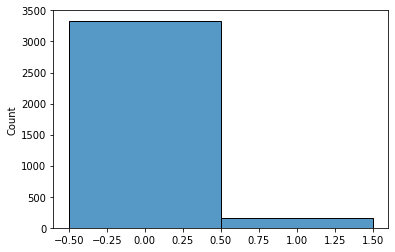

In [ ]:
# Combine model with model of embeddings
combine_model_and_emb(clf, 'lr_and_embeddings.csv')

##XGBoost

#### Grid search for XGBoost

In [ ]:
'''
THIS PART WILL BE COMMENTED OUT FOR THE PURPOSE OF RUNNING THE NOTEBOOK FASTER
xgb_clf = XGBClassifier(random_state=42)

param_grid = {'max_depth':[4,5,8,10],
              'n_estimators':list((range(50,101,10))),
              'learning_rate':[0.1,0.05,0.01,0.005,0.001],
              'gamma' :[0.3,0.5,0.7],
              'eval_metric':['error'],
              'min_child_weight' : [4,5,7,8],
              'seed':[42]
              }
# Instantiate the grid search object
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')
roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, grid_xgb)
print(grid_xgb.best_params_)
'''

"\nTHIS PART WILL BE COMMENTED OUT FOR THE PURPOSE OF RUNNING THE NOTEBOOK FASTER\nxgb_clf = XGBClassifier(random_state=42)\n\nparam_grid = {'max_depth':[4,5,8,10],\n              'n_estimators':list((range(50,101,10))),\n              'learning_rate':[0.1,0.05,0.01,0.005,0.001],\n              'gamma' :[0.3,0.5,0.7],\n              'eval_metric':['error'],\n              'min_child_weight' : [4,5,7,8],\n              'seed':[42]\n              }\n# Instantiate the grid search object\ngrid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')\nroc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, grid_xgb)\nprint(grid_xgb.best_params_)\n"

ROC curve: 


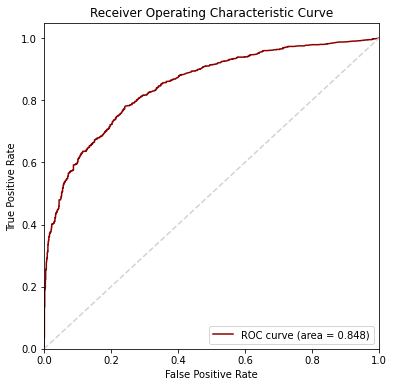

Best Threshold=0.415038, F-Score=0.775


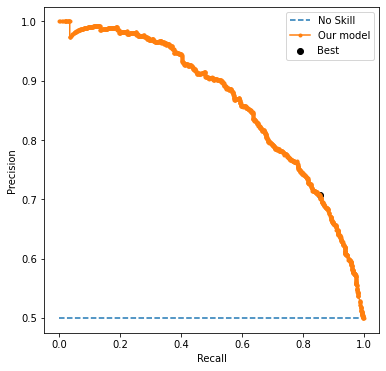

Train accuracy : 0.7714932126696833
Test accuracy : 0.7645376549094376
Train f1 : 0.7692122669873723
Test f1 : 0.7687265917602998

               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1049
           1       0.76      0.78      0.77      1049

    accuracy                           0.76      2098
   macro avg       0.76      0.76      0.76      2098
weighted avg       0.76      0.76      0.76      2098


train accuracy best = 0.7713741366992141 with threshold = 0.5060000000000001
test accuracy best = 0.7688274547187798 with threshold = 0.5060000000000001
test f1 score best = 0.7748058671268334 with threshold = 0.41500000000000004


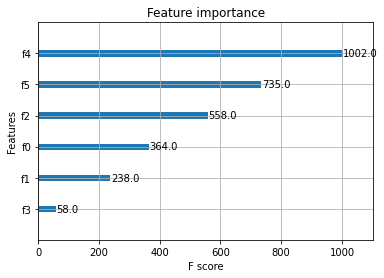

In [ ]:
xgb_clf = XGBClassifier(random_state=42, eval_metric = 'error', gamma = 0.7, learning_rate = 0.1, max_depth = 10, min_child_weight = 8, n_estimators = 100, seed = 42)
roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, xgb_clf)

#Save predictions
save_preds(fin_test_preds_thres, 'xgb_clg_grid.csv')

ROC curve: 


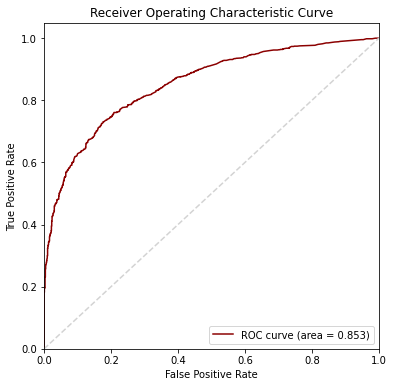

Best Threshold=0.515984, F-Score=0.773


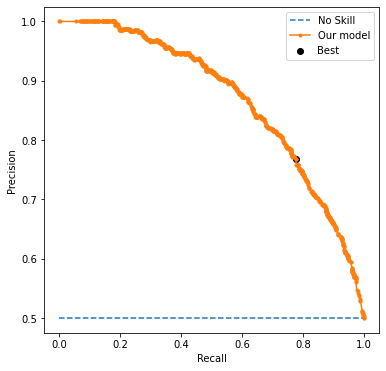

Train accuracy : 0.7441057394617766
Test accuracy : 0.763584366062917
Train f1 : 0.740990719537182
Test f1 : 0.7703703703703703

               precision    recall  f1-score   support

           0       0.78      0.73      0.76      1049
           1       0.75      0.79      0.77      1049

    accuracy                           0.76      2098
   macro avg       0.76      0.76      0.76      2098
weighted avg       0.76      0.76      0.76      2098


train accuracy best = 0.7396999285544177 with threshold = 0.5510000000000002
test accuracy best = 0.7774070543374643 with threshold = 0.5510000000000002
test f1 score best = 0.7725072604065827 with threshold = 0.5290000000000001


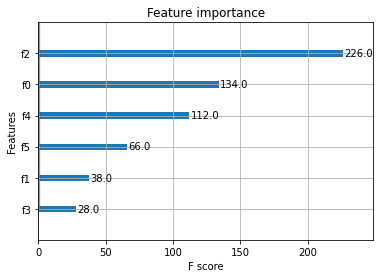

In [ ]:
#Hand set xgboost
xgb_clf = XGBClassifier(random_state=42, eval_metric = 'logloss', gamma = 0.7, learning_rate = 0.1, max_depth = 5, min_child_weight = 8, n_estimators = 50, seed = 42)
roc_auc, fin_test_preds, fin_test_preds_thres = prediction(residual_g, train_features_normal, test_features_normal, train_labels, test_labels, fin_test_features_normal, xgb_clf)

#Save predictions
save_preds(fin_test_preds_thres, 'simple_xgb.csv')

ROC curve: 


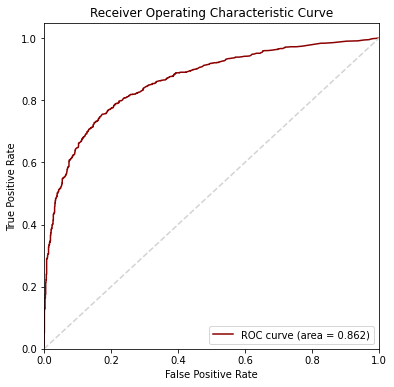

Best Threshold=0.490293, F-Score=0.789


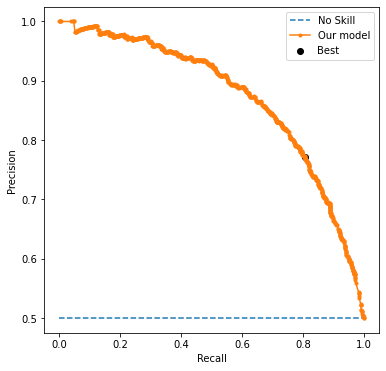

Train accuracy : 0.7492260061919505
Test accuracy : 0.7869399428026692
Train f1 : 0.7426686217008799
Test f1 : 0.7892503536067893

               precision    recall  f1-score   support

           0       0.79      0.78      0.78      1049
           1       0.78      0.80      0.79      1049

    accuracy                           0.79      2098
   macro avg       0.79      0.79      0.79      2098
weighted avg       0.79      0.79      0.79      2098


accuracy best = 0.7907530981887512  with threshold = 0.5430000000000001
f1 score best = 0.7893755824790307  with threshold = 0.4900000000000001


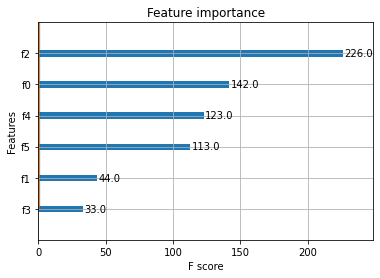

ROC curve: 


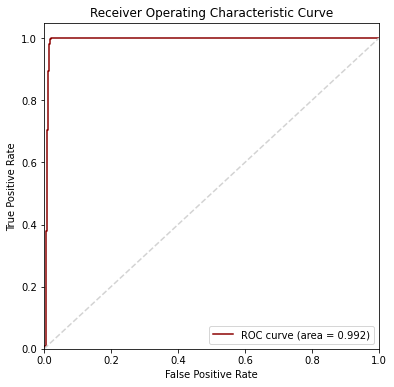

Best Threshold=0.506123, F-Score=0.990


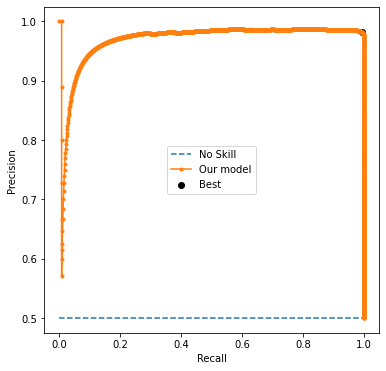

Train accuracy : 0.9919028340080972
Test accuracy : 0.9895138226882746
Train f1 : 0.9919659735349716
Test f1 : 0.9895833333333333

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1049
           1       0.98      1.00      0.99      1049

    accuracy                           0.99      2098
   macro avg       0.99      0.99      0.99      2098
weighted avg       0.99      0.99      0.99      2098

No feature importance plot

accuracy best = 0.9895138226882746  with threshold = 0.5060000000000001
f1 score best = 0.9895833333333333  with threshold = 0.5060000000000001


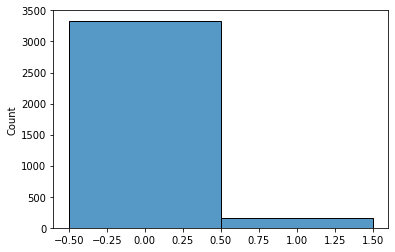

In [ ]:
# Combine model with model of embeddings
combine_model_and_emb(xgb_clf, 'XGB_and_embeddings.csv')

In [ ]:
# Train on everything
features_normal = train_features_normal + test_features_normal
labels = train_labels + test_labels

xgb_clf = XGBClassifier(random_state=42, eval_metric = 'logloss', gamma = 0.7, learning_rate = 0.1, max_depth = 5, min_child_weight = 8, n_estimators = 50, seed = 42)
xgb_clf.fit(features_normal, labels)

# Predictions with optimised threshold  
fin_test_preds_thres=(xgb_clf.predict_proba(fin_test_features_normal)[:,1]>=0.5640000000000002).astype(int)

#Save predictions
save_preds(fin_test_preds_thres, 'simple_xgb_full_train.csv')

# UNSUPERVISED

Unsupervised learning for link prediction typically involves training a model to learn the underlying patterns in the network without using any explicit supervision. One common approach for unsupervised link prediction is to use a graph autoencoder.

Here's a general outline of how you could implement an unsupervised graph autoencoder for link prediction:

Define a graph autoencoder model that consists of two parts: an encoder that maps nodes to low-dimensional embeddings, and a decoder that maps embeddings back to a reconstructed adjacency matrix.

Define a loss function that measures the difference between the original adjacency matrix and the reconstructed adjacency matrix. One commonly used loss function for this purpose is the binary cross-entropy loss.

Train the model using only the adjacency matrix as input, without any explicit supervision. The goal is for the encoder to learn a low-dimensional representation of the nodes that captures the underlying structure of the network, and for the decoder to learn to reconstruct the adjacency matrix from these representations.

Once the model is trained, use the encoder to obtain embeddings for the nodes in the network. These embeddings can be used for downstream tasks such as node classification or link prediction.

To perform link prediction, compute the similarity between the embeddings of pairs of nodes that are not connected in the original network, and rank them according to this similarity. The idea is that pairs of nodes that are more similar in their embedding space are more likely to form a link in the network.

It's worth noting that unsupervised link prediction methods tend to perform worse than supervised methods that use explicit labels or annotations, but they can still be useful in cases where labeled data is scarce or unavailable.

In [ ]:
# compute similarity scores for all pairs of nodes in test set
cos_similarity_scores = cosine_similarity(train_features_embedding)
euc_similarity_scores = euclidean_distances(train_features_embedding)
pearson_similarity_scores = 1 - pairwise_distances(train_features_embedding, metric='correlation')

# Take the mean of the similarity scores
# stack arrays along the third axis
stacked = np.stack([cos_similarity_scores, euc_similarity_scores, pearson_similarity_scores], axis=2)

# take the mean along the third axis
similarity_scores = np.mean(stacked, axis=2)

# get indices of pairs of nodes in test set
test_indices = train_samples

# rank pairs of nodes by similarity score
ranked_pairs = sorted(zip(test_indices, similarity_scores.ravel()), key=lambda x: x[1], reverse=True)

# get top-ranked pairs as predictions for new links
num_predictions = 1800
predicted_links = [i[0] for i in ranked_pairs[:num_predictions]]

# Create array of zeros
predictions = np.zeros(len(test_indices))

# Set corresponding elements to 1 if tuple is in predicted_links
for i, idx in enumerate(test_indices):
    if idx in predicted_links:
        predictions[i] = 1

test_acc = accuracy_score(np.array(train_labels), predictions)
print(test_acc)

#--------------------------Produce kaggle submission------------------------------------
# compute similarity scores for all pairs of nodes in test set
cos_similarity_scores = cosine_similarity(fin_test_features_embedding)
euc_similarity_scores = euclidean_distances(fin_test_features_embedding)
pearson_similarity_scores = 1 - pairwise_distances(fin_test_features_embedding, metric='correlation')

# Take the mean of the similarity scores
# stack arrays along the third axis
stacked = np.stack([cos_similarity_scores, euc_similarity_scores, pearson_similarity_scores], axis=2)

# take the mean along the third axis
similarity_scores = np.mean(stacked, axis=2)

# get indices of pairs of nodes in test set
test_indices = [tuple(lst) for lst in test_set]

# rank pairs of nodes by similarity score
ranked_pairs = sorted(zip(test_indices, similarity_scores.ravel()), key=lambda x: x[1], reverse=True)

# get top-ranked pairs as predictions for new links
predicted_links = [i[0] for i in ranked_pairs[:num_predictions]]

# Create array of zeros
predictions = np.zeros(len(test_indices))

# Set corresponding elements to 1 if tuple is in predicted_links
for i, idx in enumerate(test_indices):
    if idx in predicted_links:
        predictions[i] = 1

save_preds(predictions, 'unsupervised_3_metrics.csv')

0.7143367468444868


## Unsupervised using MLP

 it's normal to set the target labels for the training data to 1 in unsupervised link prediction problems. This is because we do not have any labeled data indicating which pairs of nodes are connected or not. Therefore, we use all the pairs of nodes in the training data as positive examples, assuming that they are all connected. This allows the model to learn the underlying patterns and similarities among the nodes that are indicative of links.

In other words, the goal is to learn a function that maps pairs of nodes to a similarity score, with the assumption that pairs of nodes that have a high similarity score are more likely to be connected in the network. The unsupervised learning approach allows us to learn these patterns without any prior knowledge of the network structure, and can potentially discover new connections that were not previously known.

The predicted value in this case is not the similarity score itself, but rather a score that indicates how likely it is that a pair of nodes in the graph are connected. This score can be interpreted as a measure of similarity between the two nodes, where higher scores indicate greater similarity (i.e., greater likelihood of a connection).

The type of similarity being used in this code is cosine similarity, which is a common measure of similarity between vectors. In this case, the vectors being compared are the embeddings of the two nodes being considered for a potential connection. The feature function defined earlier concatenates the embeddings of the two nodes and the absolute difference between them to create a new vector that represents the pair of nodes. The cosine similarity between this new vector and a fixed reference vector (in this case, a vector of ones) is then used as the input to the neural network for predicting the connection probability.

In [ ]:
# get features for train and test sets
train_features = train_features_embedding
test_features = test_features_embedding
fin_test_features = fin_test_features_embedding

# train unsupervised model for link prediction
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(128, 32, 8), activation='relu', solver='adam', max_iter=200, verbose=True, random_state=7)
model.fit(train_features, np.ones(len(train_features)))

# predict links on test set
similarity_scores = model.predict(test_features)

# rank pairs of nodes by similarity score
test_indices = test_samples
ranked_pairs = sorted(zip(test_indices, similarity_scores.ravel()), key=lambda x: x[1], reverse=True)

# get top-ranked pairs as predictions for new links
num_predictions = 1800
predicted_links = [i[0] for i in ranked_pairs[:num_predictions]]

# evaluate performance on test set
actual_links = set([(edge[0], edge[1]) for i, edge in enumerate(test_samples) if test_labels[i] == 1])
predicted_links_set = set(predicted_links)

true_positives = len(actual_links.intersection(predicted_links_set))
false_positives = len(predicted_links_set.difference(actual_links))
false_negatives = len(actual_links.difference(predicted_links_set))
true_negatives = len(set([(edge[0], edge[1]) for i, edge in enumerate(test_samples) if test_labels[i] == 0]).difference(predicted_links_set))

accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

#Get predictions for kaggle
# predict links on test set
similarity_scores_test = model.predict(fin_test_features)

#Put the test set in correct format
test_indices = [tuple(lst) for lst in test_set]

# rank pairs of nodes by similarity score
ranked_pairs = sorted(zip(test_indices, similarity_scores.ravel()), key=lambda x: x[1], reverse=True)

# get top-ranked pairs as predictions for new links
fin_predicted_links = [i[0] for i in ranked_pairs[:num_predictions]]

# Create array of zeros
predictions = np.zeros(len(test_indices))

# Set corresponding elements to 1 if tuple is in predicted_links
for i, idx in enumerate(test_indices):
    if idx in fin_predicted_links:
        predictions[i] = 1

save_preds(predictions, 'unsupervised_MLP.csv')

Iteration 1, loss = 0.77201948
Iteration 2, loss = 0.12397606
Iteration 3, loss = 0.01468983
Iteration 4, loss = 0.00374686
Iteration 5, loss = 0.00269665
Iteration 6, loss = 0.00211356
Iteration 7, loss = 0.00176681
Iteration 8, loss = 0.00139586
Iteration 9, loss = 0.00118281
Iteration 10, loss = 0.00099030
Iteration 11, loss = 0.00086884
Iteration 12, loss = 0.00076571
Iteration 13, loss = 0.00064548
Iteration 14, loss = 0.00055646
Iteration 15, loss = 0.00052762
Iteration 16, loss = 0.00044889
Iteration 17, loss = 0.00039753
Iteration 18, loss = 0.00035251
Iteration 19, loss = 0.00032095
Iteration 20, loss = 0.00027231
Iteration 21, loss = 0.00024771
Iteration 22, loss = 0.00024635
Iteration 23, loss = 0.00021177
Iteration 24, loss = 0.00021305
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

Accuracy: 0.617254528122021
Precision: 0.5683333333333334
Recall: 0.9752144899904671
F1-score: 0.7181467181467182


# Others things attempted

## Clustering

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
community = greedy_modularity_communities(G)

In [ ]:
# Converting into list
clusters = []
for group in community:
  clusters.append(list(group))

In [ ]:
# Saving each list that represents one cluster into a dictionary with cluster numbers
cluster_nodes = {}
count = 0
for cluster in clusters:
  for c in cluster:
    cluster_nodes[c] = count
  count = count + 1